In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [3]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
# summarize loaded dataset
print("Train: X=%s, y=%s" % (X_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


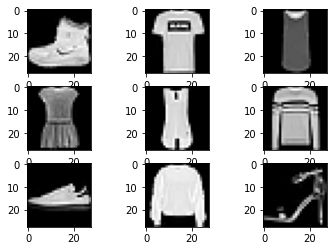

In [5]:
# plot first few images
import matplotlib.pyplot as plt

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap("gray"))
# show the figure
plt.show()

In [6]:
# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.5080 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3376 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.8857
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3543 - accuracy: 0.8740
Test Accuracy:  0.8740000128746033


In [11]:
# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4990 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3752 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3372 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2951 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2810 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2587 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2485 - accuracy: 0.9068
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.337

In [13]:
# Make prediction with the model
predictions = model.predict(X_test)

# Print the shape of the predictions array
print(predictions.shape)

# Print the first 10 predictions
print(predictions[:10])

# Convert the predictions to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# Print the first 10 class labels
print(class_labels[:10])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[1.19328462e-07 7.48648699e-10 1.14706449e-08 2.79335832e-10
  1.53172408e-09 1.36659644e-03 4.15234318e-08 8.85435846e-03
  7.83064547e-09 9.89778936e-01]
 [4.71358246e-04 1.35184886e-12 9.79514122e-01 1.79504944e-09
  1.44849932e-02 6.02949565e-11 5.52956760e-03 8.30551973e-15
  2.50669108e-09 8.05789376e-12]
 [1.02226856e-07 9.99999881e-01 2.79761717e-12 3.32076446e-08
  4.47766685e-10 5.74126767e-16 4.19516144e-10 6.34107042e-19
  4.49983904e-11 3.51722728e-19]
 [3.30743859e-07 9.99989629e-01 4.70464334e-09 9.92340483e-06
  5.79820387e-08 7.30744512e-13 4.12410124e-08 1.02400449e-15
  6.84038270e-10 2.66140018e-15]
 [9.92224440e-02 2.23966083e-07 1.41356140e-02 2.32524500e-04
  2.81940476e-04 2.64416258e-07 8.86121750e-01 1.59637864e-07
  5.02164312e-06 1.51808237e-08]
 [7.57146481e-05 9.99909163e-01 4.13547582e-07 1.61324738e-06
  1.20098122e-07 2.13702375e-10 1.28986521e-05 3.91613571e-15
  1.56738922e-09 4.31996

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [15]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
# Split the training data into training and validation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:] 
y_train = y_train[5000:]

In [17]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5015 - accuracy: 0.8232 - val_loss: 0.4040 - val_accuracy: 0.8564
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3808 - accuracy: 0.8626 - val_loss: 0.3689 - val_accuracy: 0.8698
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3415 - accuracy: 0.8760 - val_loss: 0.3580 - val_accuracy: 0.8694
Epoch 4/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3188 - accuracy: 0.8826 - val_loss: 0.3161 - val_accuracy: 0.8882
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2996 - accuracy: 0.8896 - val_loss: 0.3140 - val_accuracy: 0.8914
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2839 - accuracy: 0.8947 - val_loss: 0.3275 - val_accuracy: 0.8790
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2719 - accuracy: 0.8986 - val_loss: 0.3094 - val_accuracy:

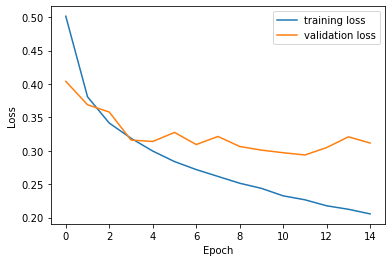

In [20]:
# Plot the training and validation loss
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

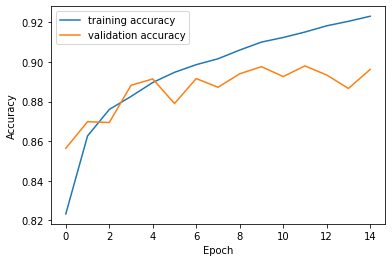

In [21]:
# Plot the training and validation accuracy
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.3432 - accuracy: 0.8858
Test Loss:  0.34321439266204834
Test Accuracy:  0.8858000040054321
